# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

## Objectives

You will be able to:

* Practice loading data with pandas
* Practice calculating measures of centrality and dispersion with pandas
* Practice creating subsets of data with pandas
* Practice using data visualizations to explore data, and interpreting those visualizations
* Perform a full exploratory data analysis process to gain insight about a dataset 

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [3]:
# Your code here
df = pd.read_csv('data/ames.csv', index_col=0)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The following code checks that you loaded the data correctly:

In [4]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [5]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [6]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

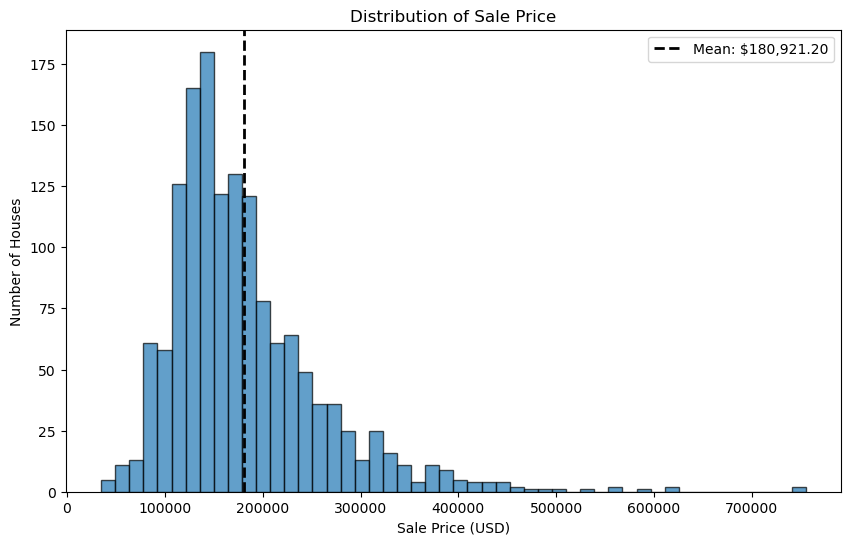

In [7]:
# Your code here

# Calculate the mean of SalePrice
mean_saleprice = df['SalePrice'].mean()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram
ax.hist(df['SalePrice'], bins=50, edgecolor='black', alpha=0.7) # Adjust bins as needed

# Add a vertical line for the mean
ax.axvline(mean_saleprice, color='black', linestyle='dashed', linewidth=2, label=f'Mean: ${mean_saleprice:,.2f}')

# Set title and labels
ax.set_title('Distribution of Sale Price')
ax.set_xlabel('Sale Price (USD)')
ax.set_ylabel('Number of Houses')

# Add a legend for the mean line
ax.legend()

# Display the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [8]:
# Your code here
mean_saleprice = df['SalePrice'].mean()
median_saleprice = df['SalePrice'].median()
std_dev_saleprice = df['SalePrice'].std()

print(f"Mean SalePrice: ${mean_saleprice:,.2f}")
print(f"Median SalePrice: ${median_saleprice:,.2f}")
print(f"Standard Deviation SalePrice: ${std_dev_saleprice:,.2f}")

Mean SalePrice: $180,921.20
Median SalePrice: $163,000.00
Standard Deviation SalePrice: $79,442.50


In the cell below, interpret the above information.

In [14]:
# Replace None with appropriate text
"""
Mean SalePrice is $180,921.20 but Median SalePrice is $163,000.00 meaning the mean is higher than the median thus showing that the prices are not spread out evenly..
Most houses are ranging around the median price but a few super pricey ones are skewing the average.
Standard Deviation SalePrice is $79,442.50 telling us how much the prices typically vary from that average and it specifically shows that houses are not selling for pretty much the same amount so there is a wide range of value in the market.
"""

'\nMean SalePrice is $180,921.20 but Median SalePrice is $163,000.00 meaning the mean is higher than the median thus showing that the prices are not spread out evenly..\nMost houses are ranging around the median price but a few super pricey ones are skewing the average.\nStandard Deviation SalePrice is $79,442.50 telling us how much the prices typically vary from that average and it specifically shows that houses are not selling for pretty much the same amount so there is a wide range of value in the market.\n'

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

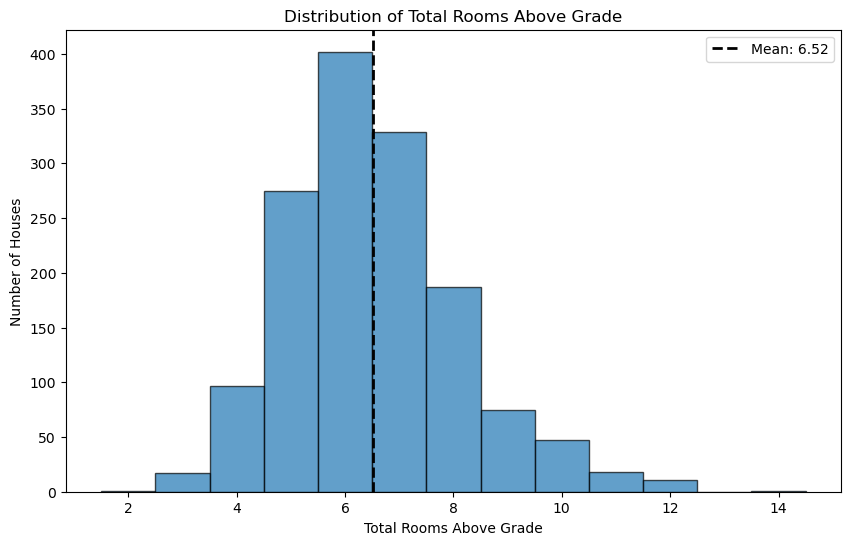

In [13]:
# Your code here

# Calculate the mean of TotRmsAbvGrd
mean_totrms = df['TotRmsAbvGrd'].mean()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram
ax.hist(df['TotRmsAbvGrd'], bins=range(df['TotRmsAbvGrd'].min(), df['TotRmsAbvGrd'].max() + 2),
        edgecolor='black', alpha=0.7, align='left') # bins adjusted for discrete room counts

# Add a vertical line for the mean
ax.axvline(mean_totrms, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_totrms:.2f}')

# Set title and labels
ax.set_title('Distribution of Total Rooms Above Grade')
ax.set_xlabel('Total Rooms Above Grade')
ax.set_ylabel('Number of Houses')

# Add a legend for the mean line
ax.legend()

# Display the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [15]:
# Your code here

mean_totrms = df['TotRmsAbvGrd'].mean()
median_totrms = df['TotRmsAbvGrd'].median()
std_dev_totrms = df['TotRmsAbvGrd'].std()

print(f"Mean Total Rooms Above Grade: {mean_totrms:.2f}")
print(f"Median Total Rooms Above Grade: {median_totrms:.0f}") # Used .0f for whole numbers of rooms
print(f"Standard Deviation Total Rooms Above Grade: {std_dev_totrms:.2f}")

Mean Total Rooms Above Grade: 6.52
Median Total Rooms Above Grade: 6
Standard Deviation Total Rooms Above Grade: 1.63


In the cell below, interpret the above information.

In [16]:
# Replace None with appropriate text
"""
For 'Total Rooms Above Grade', the mean is 6.52 while the median is 6 thus telling me that the number of rooms is pretty close to be evenly distributed.
Since the mean is just slightly higher than the median, it might mean there are a few houses with more rooms, but not enough to drastically pull the average way up.
Most houses seem to have around 6 rooms. 
The standard deviation is 1.63, which means the typical number of rooms doesn't vary that much from the average.
So, while there's some variety, most houses are probably within one or two rooms of that 6-room mark.
"""

"\nFor 'Total Rooms Above Grade', the mean is 6.52 while the median is 6 thus telling me that the number of rooms is pretty close to be evenly distributed.\nSince the mean is just slightly higher than the median, it might mean there are a few houses with more rooms, but not enough to drastically pull the average way up.\nMost houses seem to have around 6 rooms. \nThe standard deviation is 1.63, which means the typical number of rooms doesn't vary that much from the average.\nSo, while there's some variety, most houses are probably within one or two rooms of that 6-room mark.\n"

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

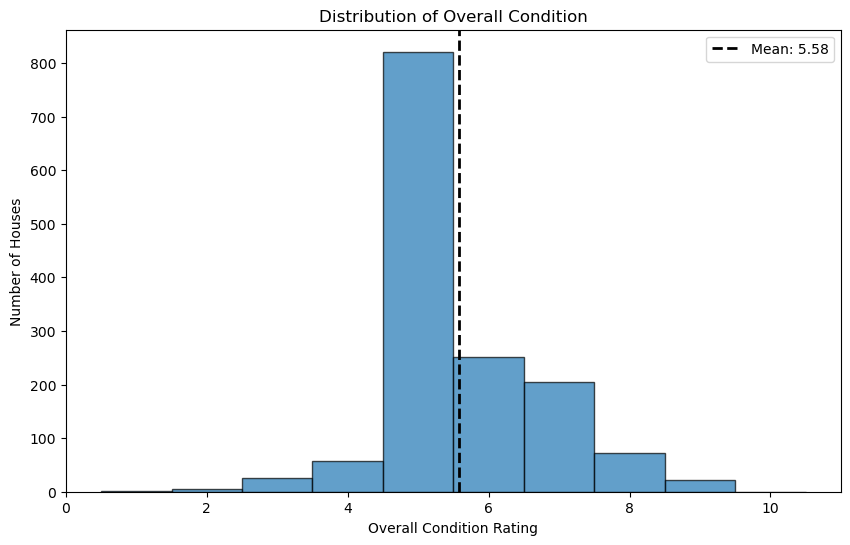

In [17]:
# Your code here

# Calculate the mean of OverallCond
mean_overallcond = df['OverallCond'].mean()

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram
# Since OverallCond is an integer rating, setting specific bins might be helpful
ax.hist(df['OverallCond'], bins=range(1, 12), edgecolor='black', alpha=0.7, align='left') # Bins from 1 to 11 for values 1-10

# Add a vertical line for the mean
ax.axvline(mean_overallcond, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_overallcond:.2f}')

# Set title and labels
ax.set_title('Distribution of Overall Condition')
ax.set_xlabel('Overall Condition Rating')
ax.set_ylabel('Number of Houses')

# Add a legend for the mean line
ax.legend()

# Display the plot
plt.show()

Now, print out the mean, median, and standard deviation:

In [18]:
# Your code here
mean_overallcond = df['OverallCond'].mean()
median_overallcond = df['OverallCond'].median()
std_dev_overallcond = df['OverallCond'].std()

print(f"Mean Overall Condition: {mean_overallcond:.2f}")
print(f"Median Overall Condition: {median_overallcond:.0f}") # It's a rating, so round to whole number
print(f"Standard Deviation Overall Condition: {std_dev_overallcond:.2f}")

Mean Overall Condition: 5.58
Median Overall Condition: 5
Standard Deviation Overall Condition: 1.11


In the cell below, interpret the above information.

In [19]:
# Replace None with appropriate text
"""
Mean is 5.58 and the median is 5 -This looks like most houses are rated around 'Average' (which is a 5) or maybe just slightly better than average. 
The mean being a little higher than the median could mean there are more houses rated 'Above Average' or 'Good' compared to 'Below Average' or 'Fair', just slightly skewing it up.
The standard deviation is 1.11, which is pretty small - This tells me that the condition ratings don't really spread out too much. 
Most houses are probably clustered around the 'Average' rating, maybe a little above or below. It means we don't see a huge number of 'Very Excellent' or 'Very Poor' houses in this dataset; most are somewhere in the middle
"""

"\nMean is 5.58 and the median is 5 -This looks like most houses are rated around 'Average' (which is a 5) or maybe just slightly better than average. \nThe mean being a little higher than the median could mean there are more houses rated 'Above Average' or 'Good' compared to 'Below Average' or 'Fair', just slightly skewing it up.\nThe standard deviation is 1.11, which is pretty small - This tells me that the condition ratings don't really spread out too much. \nMost houses are probably clustered around the 'Average' rating, maybe a little above or below. It means we don't see a huge number of 'Very Excellent' or 'Very Poor' houses in this dataset; most are somewhere in the middle\n"

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [20]:
# Replace None with appropriate code
below_average_condition = df[df['OverallCond'] < 5]
average_condition = df[df['OverallCond'] == 5]
above_average_condition = df[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [21]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

In [22]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

Interpret the plot above. What does it tell us about these overall condition categories, and the relationship between overall condition and sale price? Is there anything surprising?

In [23]:
# Replace None with appropriate text
"""
It's pretty clear that there's a strong connection between a house's condition and its sale price. The above_average_condition houses (the cyan bars) definitely tend to sell for much higher prices. 
Their distribution is shifted way to the right compared to the others.
The average_condition houses (the gray bars) are where most sales happen, and their prices are in that middle range, which makes sense.
And then the below_average_condition houses (the yellow bars) are pretty much all on the lower end of the sale price spectrum. Their distribution is squashed over to the left.
Better condition generally means a higher price – that's what you'd expect in real life, right? What might be a bit surprising is just how clearly separated those distributions are. It really shows that 'OverallCond' isn't just a minor factor; it has a huge impact on how much a house sells for. It also confirms that treating 'OverallCond' as a categorical thing for this kind of analysis was a good idea, because the groups behave so differently.
"""

"\nIt's pretty clear that there's a strong connection between a house's condition and its sale price. The above_average_condition houses (the cyan bars) definitely tend to sell for much higher prices. \nTheir distribution is shifted way to the right compared to the others.\nThe average_condition houses (the gray bars) are where most sales happen, and their prices are in that middle range, which makes sense.\nAnd then the below_average_condition houses (the yellow bars) are pretty much all on the lower end of the sale price spectrum. Their distribution is squashed over to the left.\nBetter condition generally means a higher price – that's what you'd expect in real life, right? What might be a bit surprising is just how clearly separated those distributions are. It really shows that 'OverallCond' isn't just a minor factor; it has a huge impact on how much a house sells for. It also confirms that treating 'OverallCond' as a categorical thing for this kind of analysis was a good idea, beca

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [24]:
# Your code here

# Calculate correlations of all numeric columns with 'SalePrice'
correlations = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

# Get the most positively correlated feature (excluding SalePrice itself)
# The first one in the sorted list will be SalePrice, so we take the second one.
most_positive_corr_feature = correlations.index[1]
most_positive_corr_value = correlations.iloc[1]

print(f"Most positively correlated feature with SalePrice: {most_positive_corr_feature}")
print(f"Correlation value: {most_positive_corr_value:.4f}") # Print with 4 decimal places for precision

Most positively correlated feature with SalePrice: OverallQual
Correlation value: 0.7910


Now, find the ***most negatively correlated*** column:

In [25]:
# Your code here

# Calculate correlations of all numeric columns with 'SalePrice' (if not already done, though it should be from last step)
# correlations = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
# If you run the above line again, it will sort descending (highest positive first).
# For most negative, we can just look at the end of that list, or sort ascending this time.

# Let's re-calculate and sort ascending to easily get the most negative at the top
correlations_ascending = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=True)

# The first one in this ascending sorted list will be the most negatively correlated
most_negative_corr_feature = correlations_ascending.index[0]
most_negative_corr_value = correlations_ascending.iloc[0]

print(f"Most negatively correlated feature with SalePrice: {most_negative_corr_feature}")
print(f"Correlation value: {most_negative_corr_value:.4f}")

Most negatively correlated feature with SalePrice: KitchenAbvGr
Correlation value: -0.1359


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

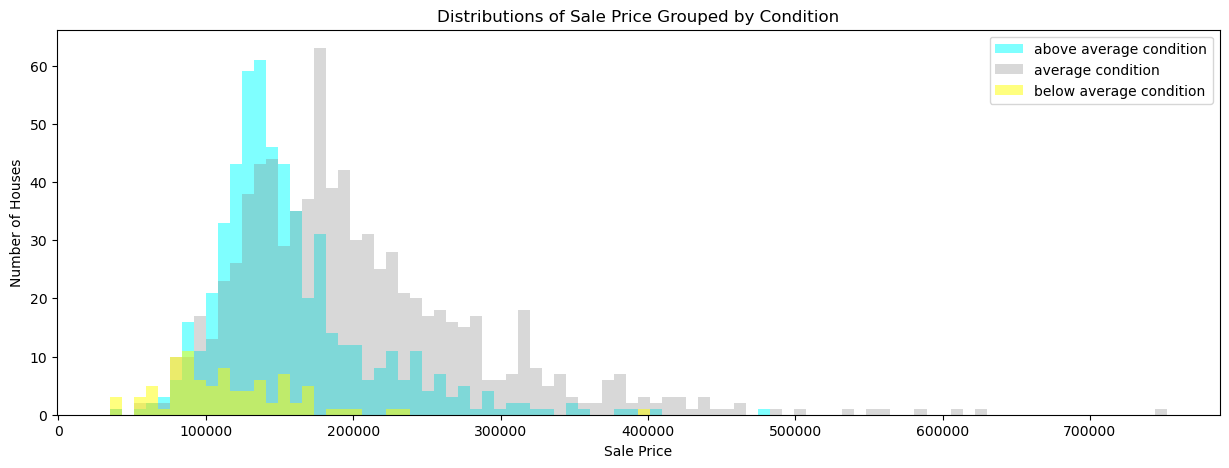

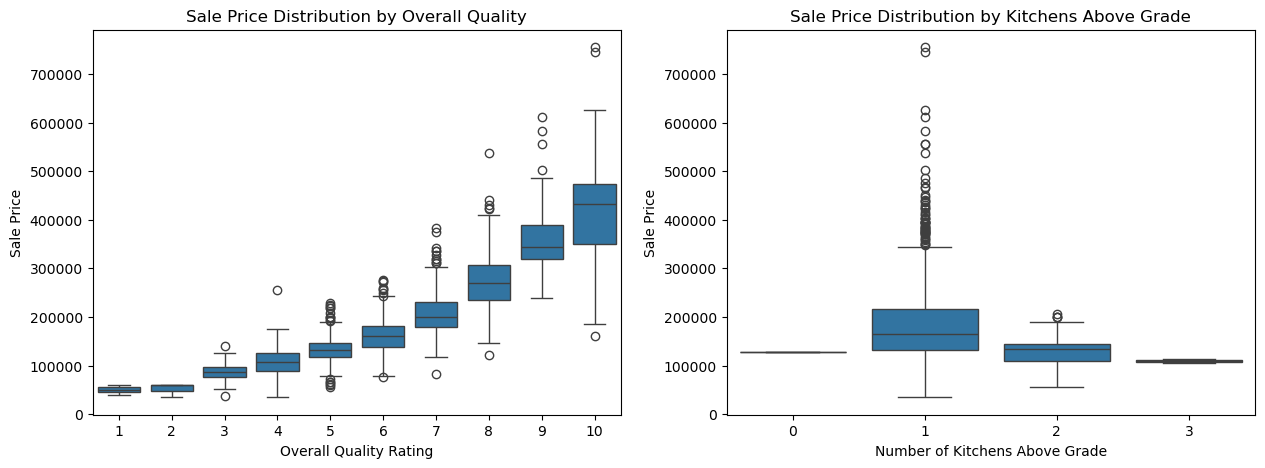

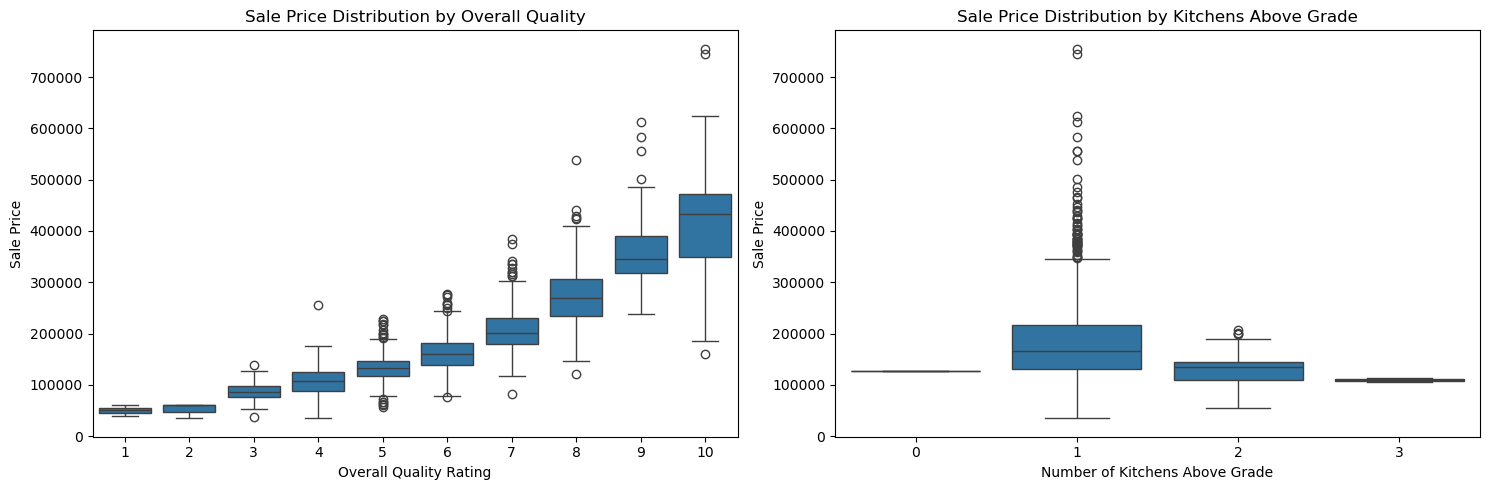

In [27]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["OverallQual"], # Most positively correlated feature
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["KitchenAbvGr"], # Most negatively correlated feature
    y=df["SalePrice"],
    ax=ax2
)

# Customize labels
ax1.set_title("Sale Price Distribution by Overall Quality")
ax1.set_xlabel("Overall Quality Rating")
ax1.set_ylabel("Sale Price")
ax2.set_title("Sale Price Distribution by Kitchens Above Grade")
ax2.set_xlabel("Number of Kitchens Above Grade")
ax2.set_ylabel("Sale Price");

plt.tight_layout()
plt.show()

Interpret the results below. Consult `data/data_description.txt` as needed.

In [28]:
# Replace None with appropriate text
"""
For OverallQual (how good the house is):
The better the house's quality rating, the higher its sale price. The boxes just climb higher and higher the more 'quality' a house has. A really nice house sells for way more than a run-down one.

For KitchenAbvGr (number of kitchens):
Most houses have just one kitchen, and they sell for typical prices. But surprisingly, houses with two kitchens actually seem to sell for less money than houses with one kitchen. So, more kitchens above ground doesn't always mean more value in this dataset. It's like having a second kitchen might be for a reason that lowers the appeal for most buyers.
"""

"\nFor OverallQual (how good the house is):\nThe better the house's quality rating, the higher its sale price. The boxes just climb higher and higher the more 'quality' a house has. A really nice house sells for way more than a run-down one.\n\nFor KitchenAbvGr (number of kitchens):\nMost houses have just one kitchen, and they sell for typical prices. But surprisingly, houses with two kitchens actually seem to sell for less money than houses with one kitchen. So, more kitchens above ground doesn't always mean more value in this dataset. It's like having a second kitchen might be for a reason that lowers the appeal for most buyers.\n"

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [29]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

YrSold
2006    314
2007    329
2008    304
2009    338
2010    175
Name: count, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

In [30]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

Interpret this plot below:

In [31]:
# Replace None with appropriate text
"""
You can see a general trend where older houses tend to sell for less money, and newer houses generally sell for more. The dots seem to be denser and higher up on the left side (younger ages) and spread out more and lower as you move to the right (older ages).
However, it's not a super tight line. There's a lot of scatter, meaning you can still find some older houses that sold for a good amount, and some newer ones that sold for less.
It's not a perfect correlation, but the overall pattern is definitely there. It's like 'age' has an impact, but it's not the only thing deciding the price, which makes sense since we already saw how 'Overall Quality' was a big deal too.
"""

"\nYou can see a general trend where older houses tend to sell for less money, and newer houses generally sell for more. The dots seem to be denser and higher up on the left side (younger ages) and spread out more and lower as you move to the right (older ages).\nHowever, it's not a super tight line. There's a lot of scatter, meaning you can still find some older houses that sold for a good amount, and some newer ones that sold for less.\nIt's not a perfect correlation, but the overall pattern is definitely there. It's like 'age' has an impact, but it's not the only thing deciding the price, which makes sense since we already saw how 'Overall Quality' was a big deal too.\n"

## Summary

Congratulations, you've completed an exploratory data analysis of a popular dataset. You saw how to inspect the distributions of individual columns, subsets of columns, correlations, and new engineered features.